In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [6]:
df=pd.read_excel("hangikredi.xlsx")
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign  y  

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [8]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
df['job'] = pd.factorize(df['job'])[0]
print(df['job'])

0        0
1        1
2        2
3        3
4        4
        ..
39995    1
39996    0
39997    6
39998    0
39999    1
Name: job, Length: 40000, dtype: int64


In [10]:
print(df['y'])

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    0
Name: y, Length: 40000, dtype: int64


In [11]:
df['y'] = pd.factorize(df['y'])[0]
df.marital.unique()
df['marital'] = pd.factorize(df['marital'])[0]
print(df['marital'])

0        0
1        1
2        0
3        0
4        1
        ..
39995    0
39996    1
39997    2
39998    0
39999    0
Name: marital, Length: 40000, dtype: int64


In [12]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [13]:
df['education'] = pd.factorize(df['education'])[0]
print(df['education'])

0        0
1        1
2        1
3        2
4        2
        ..
39995    0
39996    0
39997    1
39998    0
39999    1
Name: education, Length: 40000, dtype: int64


In [14]:
df.contact.unique()


array(['unknown', 'cellular', 'telephone'], dtype=object)

In [15]:
df['contact'] = pd.factorize(df['contact'])[0]
print(df['contact'])

0        0
1        0
2        0
3        0
4        0
        ..
39995    1
39996    1
39997    1
39998    1
39999    1
Name: contact, Length: 40000, dtype: int64


In [16]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [17]:

df['month'] = pd.factorize(df['month'])[0]
print(df['month'])

0        0
1        0
2        0
3        0
4        0
        ..
39995    1
39996    1
39997    1
39998    1
39999    1
Name: month, Length: 40000, dtype: int64


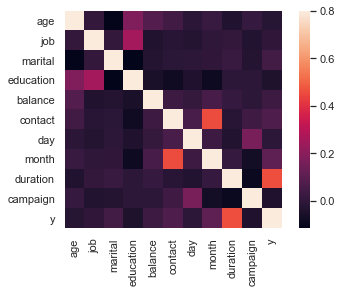

,y
duration,0.461169
month,0.106168
contact,0.073784
marital,0.046550
balance,0.030232
job,0.002158
day,-0.006420
age,-0.020273
campaign,-0.040350
education,-0.043219


In [18]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix
import seaborn as maps
maps.heatmap(correlation_matrix, vmax = .8, square = True)
plt.show()
corr_left=pd.DataFrame(correlation_matrix['y'].drop('y').sort_values(ascending=False))
corr_left

In [19]:
df.dropna(subset = ["day"], inplace=True)

In [20]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
y            False
dtype: bool

In [21]:
del df['day']

In [22]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
month        False
duration     False
campaign     False
y            False
dtype: bool

In [23]:
df.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81])

In [24]:
del df['month']

In [25]:
print(df['y'])

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    0
Name: y, Length: 40000, dtype: int64


In [26]:
print(type(df['y'][0]))

<class 'numpy.int64'>


In [27]:
print(df)

       age  job  marital  education default  balance housing loan  contact  \
0       58    0        0          0      no     2143     yes   no        0   
1       44    1        1          1      no       29     yes   no        0   
2       33    2        0          1      no        2     yes  yes        0   
3       47    3        0          2      no     1506     yes   no        0   
4       33    4        1          2      no        1      no   no        0   
...    ...  ...      ...        ...     ...      ...     ...  ...      ...   
39995   53    1        0          0      no      395      no   no        1   
39996   30    0        1          0      no     3340      no   no        1   
39997   54    6        2          1      no      200      no   no        1   
39998   34    0        0          0      no     1047      no   no        1   
39999   38    1        0          1      no     1442     yes   no        1   

       duration  campaign  y  
0           261         1  0  
1

In [28]:
df['default'] = pd.factorize(df['default'])[0]
df['housing'] = pd.factorize(df['housing'])[0]
df['y'] = pd.factorize(df['y'])[0]
df['loan'] = pd.factorize(df['loan'])[0]

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection, linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics


In [32]:
classifiers = [["KNN", KNeighborsClassifier(n_neighbors=3, weights='distance')],
               ["DT", DecisionTreeClassifier(random_state=0)],
              ]

classifier_types = []
for name, clf in classifiers:
    print('\nMetric for ' + name)
    cv_predicted = cross_val_predict(clf, X_train, Y_train, cv=5)
    print( metrics.classification_report(Y_train, cv_predicted))

    scores = model_selection.cross_val_score(clf, X_train, Y_train)
    print('\nCross validation scores: ', scores.mean())
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    print('Accuracy score for ' + name, accuracy_score(Y_test, predictions))
    classifier_types.append((name, clf))


Metric for KNN
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     33383
           1       0.42      0.27      0.33      2617

    accuracy                           0.92     36000
   macro avg       0.68      0.62      0.64     36000
weighted avg       0.91      0.92      0.91     36000


Cross validation scores:  0.9196388888888889
Accuracy score for KNN 0.91875

Metric for DT
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     33383
           1       0.32      0.35      0.34      2617

    accuracy                           0.90     36000
   macro avg       0.64      0.65      0.64     36000
weighted avg       0.90      0.90      0.90     36000


Cross validation scores:  0.8993888888888888
Accuracy score for DT 0.90325


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
feature_names = list(df.drop('y', axis = 1).axes[1])
labels = np.where(df['y'] == 1, 1, 0)
label_names = np.unique(labels)

from sklearn.model_selection import train_test_split
features = df.drop('y', axis = 1).to_numpy().astype(np.float)
label_names = np.unique(labels)
feature_names = list(df.drop('y', axis = 1).axes[1])
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.1, random_state=0)

from sklearn import model_selection
from sklearn.tree import export_graphviz
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=1e-02)
clf = clf.fit(X_train, Y_train)
tree.export_graphviz(clf, out_file='tree.dot')

import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("tree.pdf")

from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=feature_names,
                         class_names=str(label_names),
                         filled=True, rounded=True,
                         special_characters=True
                         )
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("coloured_tree.pdf")
scores = model_selection.cross_val_score(clf, X_train, Y_train)
print('\nCross validation scores: ', scores.mean())
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
print('Accuracy score for ' + name, accuracy_score(Y_test, predictions))


Cross validation scores:  0.9273055555555555
Accuracy score for DT 0.93025
